In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from azure.cosmos import CosmosClient
import json
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json
import pickle

In [14]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk prophet azure-cosmos


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
client = CosmosClient(url="https://msft-beta.documents.azure.com:443/", credential="yBg7spV75tDnpqDmkuFIJmVMB4ky3VzlcT8UCQagZeqvsx90v8cMH6WviJQQ3A0Z8FRn3poIzrYkACDbGAK1Nw==")

In [16]:
database = client.get_database_client("stock_trade_game")

container = database.get_container_client("STOCK")

stocks_history_raw = list(container.read_all_items())

In [17]:
json_string = json.dumps(stocks_history_raw[0])

df_raw = pd.read_json(json_string)

df_raw

,Stock_Data_IBM,Stock_Data_MSFT,Stock_Data_JPM,Stock_Data_TSLA,Stock_Data_META,id,_rid,_self,_etag,_attachments,_ts
0,"{'day': 1, 'date': '2023-08-04', 'price': '144...","{'day': 1, 'date': '2023-08-04', 'price': '327...","{'day': 1, 'date': '2023-08-04', 'price': '156...","{'day': 1, 'date': '2023-08-04', 'price': '253...","{'day': 1, 'date': '2023-08-04', 'price': '310...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
1,"{'day': 2, 'date': '2023-08-03', 'price': '144...","{'day': 2, 'date': '2023-08-03', 'price': '326...","{'day': 2, 'date': '2023-08-03', 'price': '156...","{'day': 2, 'date': '2023-08-03', 'price': '259...","{'day': 2, 'date': '2023-08-03', 'price': '313...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
2,"{'day': 3, 'date': '2023-08-02', 'price': '144...","{'day': 3, 'date': '2023-08-02', 'price': '327...","{'day': 3, 'date': '2023-08-02', 'price': '155...","{'day': 3, 'date': '2023-08-02', 'price': '254...","{'day': 3, 'date': '2023-08-02', 'price': '314...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
3,"{'day': 4, 'date': '2023-08-01', 'price': '143...","{'day': 4, 'date': '2023-08-01', 'price': '336...","{'day': 4, 'date': '2023-08-01', 'price': '157...","{'day': 4, 'date': '2023-08-01', 'price': '261...","{'day': 4, 'date': '2023-08-01', 'price': '322...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
4,"{'day': 5, 'date': '2023-07-31', 'price': '144...","{'day': 5, 'date': '2023-07-31', 'price': '335...","{'day': 5, 'date': '2023-07-31', 'price': '157...","{'day': 5, 'date': '2023-07-31', 'price': '267...","{'day': 5, 'date': '2023-07-31', 'price': '318...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
...,...,...,...,...,...,...,...,...,...,...,...
1994,"{'day': 1995, 'date': '2015-09-01', 'price': '...","{'day': 1995, 'date': '2015-09-01', 'price': '...","{'day': 1995, 'date': '2015-09-01', 'price': '...","{'day': 1995, 'date': '2015-09-01', 'price': '...","{'day': 1995, 'date': '2015-09-01', 'price': '...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
1995,"{'day': 1996, 'date': '2015-08-31', 'price': '...","{'day': 1996, 'date': '2015-08-31', 'price': '...","{'day': 1996, 'date': '2015-08-31', 'price': '...","{'day': 1996, 'date': '2015-08-31', 'price': '...","{'day': 1996, 'date': '2015-08-31', 'price': '...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
1996,"{'day': 1997, 'date': '2015-08-28', 'price': '...","{'day': 1997, 'date': '2015-08-28', 'price': '...","{'day': 1997, 'date': '2015-08-28', 'price': '...","{'day': 1997, 'date': '2015-08-28', 'price': '...","{'day': 1997, 'date': '2015-08-28', 'price': '...",45d0a6e9-b49e-4ead-a0c4-50775419f96f,LsoLANl8vy4GAAAAAAAAAA==,dbs/LsoLAA==/colls/LsoLANl8vy4=/docs/LsoLANl8v...,"""0400559a-0000-1100-0000-64d28d840000""",attachments/,1691520388
1997,"{'day': 1998, 'date': '2015-08-27', 'price': '...","{'day': 1998, 'date': '2015-08-27', 'price': '...","{'day': 1998, 'date': '2015-08-27', 'price': '...","{'day': 1998, 'date': '2015-08-27', 'price': '...","{'day': 1998, 'date': '2015-08-27', 'price': '...",45d0a6e9-b49e-4ead-a0c4-50775419f9

In [18]:
stocks_companies = ["IBM", "MSFT", "JPM", "TSLA", "META"]

df = {}
for index, row in df_raw.iterrows():
    for company_name in stocks_companies:
        data = row["Stock_Data_{}".format(company_name)]
        if company_name not in df:
          df[company_name] = {}
        df[company_name][data["date"]] = data["price"]

print(df)
df = pd.DataFrame(df)
df.index = pd.DatetimeIndex(df.index)

{'IBM': {'2023-08-04': '144.24', '2023-08-03': '144.45', '2023-08-02': '144.17', '2023-08-01': '143.33', '2023-07-31': '144.18', '2023-07-28': '143.45', '2023-07-27': '142.97', '2023-07-26': '141.07', '2023-07-25': '140.33', '2023-07-24': '139.54', '2023-07-21': '138.94', '2023-07-20': '138.38', '2023-07-19': '135.48', '2023-07-18': '135.36', '2023-07-17': '134.24', '2023-07-14': '133.40', '2023-07-13': '133.92', '2023-07-12': '132.84', '2023-07-11': '134.44', '2023-07-10': '132.90', '2023-07-07': '132.08', '2023-07-06': '132.16', '2023-07-05': '134.24', '2023-07-03': '133.67', '2023-06-30': '133.81', '2023-06-29': '134.06', '2023-06-28': '131.76', '2023-06-27': '132.34', '2023-06-26': '131.34', '2023-06-23': '129.43', '2023-06-22': '131.17', '2023-06-21': '133.69', '2023-06-20': '135.96', '2023-06-16': '137.48', '2023-06-15': '138.40', '2023-06-14': '137.20', '2023-06-13': '137.60', '2023-06-12': '136.42', '2023-06-09': '135.30', '2023-06-08': '134.41', '2023-06-07': '134.38', '2023-0

In [19]:
df

,IBM,MSFT,JPM,TSLA,META
2023-08-04,144.24,327.78,156.02,253.86,310.73
2023-08-03,144.45,326.66,156.35,259.32,313.19
2023-08-02,144.17,327.50,155.40,254.11,314.31
2023-08-01,143.33,336.34,157.18,261.07,322.71
2023-07-31,144.18,335.92,157.96,267.43,318.60
...,...,...,...,...,...
2015-09-01,142.68,41.82,61.45,238.63,87.23
2015-08-31,147.89,43.52,64.10,249.06,89.43
2015-08-28,147.98,43.93,64.13,248.48,91.01
2015-08-27,148.54,43.90,64.48,242.99,89.73


In [20]:
df = df.reindex(pd.date_range('2015-08-26', '2023-08-04'), method='bfill').reset_index().rename(columns = { 'index': 'Date' })

In [21]:
print(df.to_string())

           Date     IBM    MSFT     JPM     TSLA    META
0    2015-08-26  146.70   42.71   62.91   224.84   87.19
1    2015-08-27  148.54   43.90   64.48   242.99   89.73
2    2015-08-28  147.98   43.93   64.13   248.48   91.01
3    2015-08-29  147.98   43.93   64.13   248.48   91.01
4    2015-08-30  147.98   43.93   64.13   248.48   91.01
5    2015-08-31  147.89   43.52   64.10   249.06   89.43
6    2015-09-01  142.68   41.82   61.45   238.63   87.23
7    2015-09-02  145.05   43.36   62.57   247.69   89.89
8    2015-09-03  146.78   43.50   62.68   245.57   88.15
9    2015-09-04  143.70   42.61   61.50   241.93   88.26
10   2015-09-05  143.70   42.61   61.50   241.93   88.26
11   2015-09-06  143.70   42.61   61.50   241.93   88.26
12   2015-09-07  143.70   42.61   61.50   241.93   88.26
13   2015-09-08  147.23   43.89   63.16   248.17   89.53
14   2015-09-09  145.05   43.07   62.18   248.91   90.44
15   2015-09-10  146.20   43.29   62.66   248.48   91.98
16   2015-09-11  147.37   43.48

In [22]:
pd.date_range('2015-08-26', '2023-08-04').difference(df["Date"])
 

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

             ds       y
2501 2022-07-01  259.58
2502 2022-07-02  259.58
2503 2022-07-03  259.58
2504 2022-07-04  259.58
2505 2022-07-05  262.85
...         ...     ...
2896 2023-07-31  335.92
2897 2023-08-01  336.34
2898 2023-08-02  327.50
2899 2023-08-03  326.66
2900 2023-08-04  327.78

[400 rows x 2 columns]


01:46:01 - cmdstanpy - INFO - Chain [1] start processing
01:46:02 - cmdstanpy - INFO - Chain [1] done processing


[259.58 259.58 259.58 259.58 262.85 266.21 268.4  267.66 267.66 267.66
 264.51 253.67 252.72 254.08 256.72 256.72 256.72 254.25 259.53 262.27
 264.84 260.36 260.36 260.36 258.83 251.9  268.74 276.41 280.74 280.74
 280.74 278.01 274.82 282.47 283.65 282.91 282.91 282.91 280.32 282.3
 289.16 287.02 291.91 291.91 291.91 293.47 292.71 291.32 290.17 286.15
 286.15 286.15 277.75 276.44 275.79 278.85 268.09 268.09 268.09 265.23
 262.97 261.47 260.4  256.06 256.06 256.06 256.06 253.25 258.09 258.52
 264.46 264.46 264.46 266.65 251.99 252.22 245.38 244.74 244.74 244.74
 244.52 242.45 238.95 240.98 237.92 237.92 237.92 237.45 236.41 241.07
 237.5  232.9  232.9  232.9  240.74 248.88 249.2  246.79 234.24 234.24
 234.24 229.25 225.41 225.75 234.24 228.56 228.56 228.56 237.53 238.5
 236.48 236.15 242.12 242.12 242.12 247.25 250.66 231.32 226.75 235.87
 235.87 235.87 232.13 228.17 220.1  214.25 221.39 221.39 221.39 227.87
 228.87 224.51 242.98 247.11 247.11 247.11 241.55 241.97 241.73 241.68
 241.22 

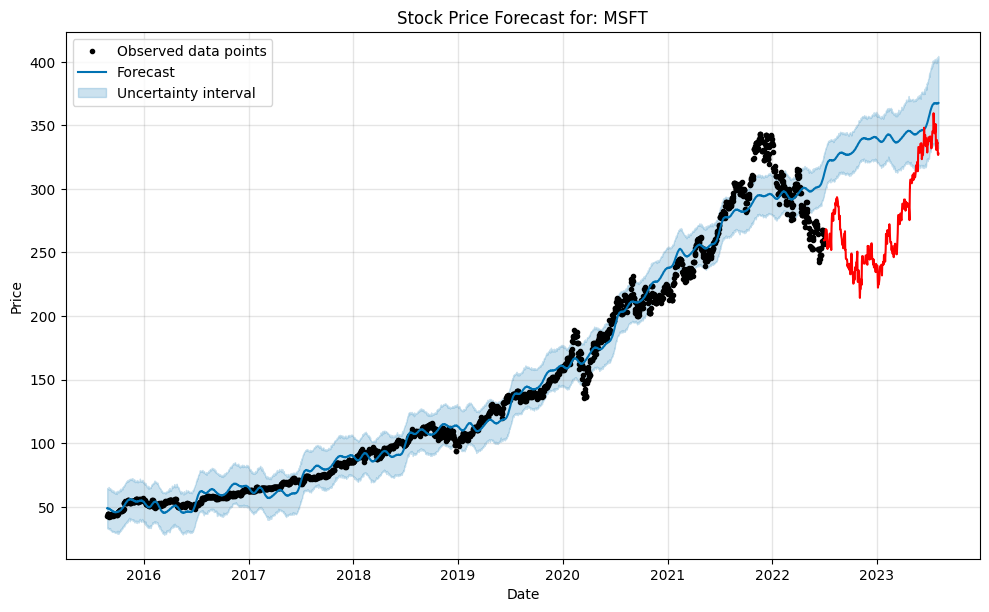

             ds       y
2501 2022-07-01  114.05
2502 2022-07-02  114.05
2503 2022-07-03  114.05
2504 2022-07-04  114.05
2505 2022-07-05  112.62
...         ...     ...
2896 2023-07-31  157.96
2897 2023-08-01  157.18
2898 2023-08-02  155.40
2899 2023-08-03  156.35
2900 2023-08-04  156.02

[400 rows x 2 columns]


01:46:04 - cmdstanpy - INFO - Chain [1] start processing
01:46:05 - cmdstanpy - INFO - Chain [1] done processing


[114.05 114.05 114.05 114.05 112.62 111.89 114.72 114.36 114.36 114.36
 112.86 112.97 111.91 108.   112.95 112.95 112.95 111.79 114.56 114.54
 115.32 114.76 114.76 114.76 115.22 113.42 115.24 114.81 115.36 115.36
 115.36 114.21 112.43 113.61 112.36 115.76 115.76 115.76 114.35 115.38
 118.39 120.14 122.13 122.13 122.13 122.46 123.63 122.59 121.64 118.63
 118.63 118.63 116.67 115.52 115.8  118.55 114.67 114.67 114.67 114.39
 114.41 113.73 114.51 113.71 113.71 113.71 113.71 113.74 115.9  118.6
 119.17 119.17 119.17 120.58 116.39 116.12 117.87 117.08 117.08 117.08
 118.16 115.83 112.49 111.21 109.14 109.14 109.14 106.79 105.85 107.99
 106.16 104.5  104.5  104.5  107.73 112.77 110.39 108.14 105.98 105.98
 105.98 104.99 101.96 103.61 109.37 111.19 111.19 111.19 115.86 118.84
 116.51 116.13 122.23 122.23 122.23 122.38 122.7  124.11 124.6  126.08
 126.08 126.08 125.88 128.15 126.97 127.2  130.68 130.68 130.68 131.37
 131.45 129.74 135.08 135.3  135.3  135.3  133.91 132.94 133.12 132.54
 133.84

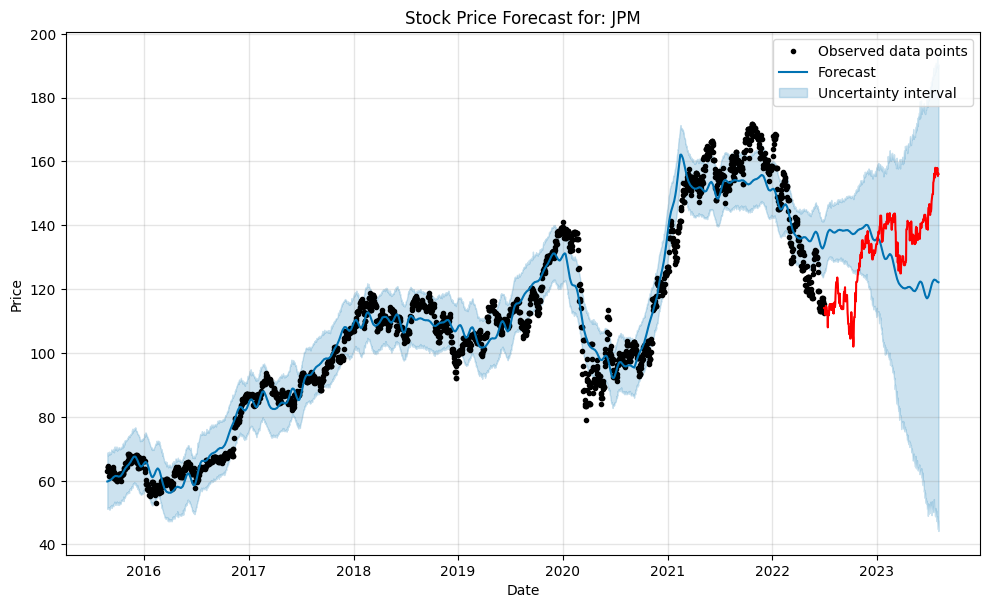

01:46:07 - cmdstanpy - INFO - Chain [1] start processing


             ds       y
2501 2022-07-01  160.03
2502 2022-07-02  160.03
2503 2022-07-03  160.03
2504 2022-07-04  160.03
2505 2022-07-05  168.19
...         ...     ...
2896 2023-07-31  318.60
2897 2023-08-01  322.71
2898 2023-08-02  314.31
2899 2023-08-03  313.19
2900 2023-08-04  310.73

[400 rows x 2 columns]


01:46:07 - cmdstanpy - INFO - Chain [1] done processing


[160.03 160.03 160.03 160.03 168.19 169.77 172.19 170.88 170.88 170.88
 162.88 163.27 163.49 158.05 164.7  164.7  164.7  167.23 175.78 183.09
 183.17 169.27 169.27 169.27 166.65 159.15 169.58 160.72 159.1  159.1
 159.1  159.93 160.19 168.8  170.57 167.11 167.11 167.11 170.25 168.53
 178.34 177.49 180.5  180.5  180.5  180.89 179.47 174.85 174.66 167.96
 167.96 167.96 163.05 161.11 163.26 168.78 161.78 161.78 161.78 159.17
 157.16 162.93 165.36 160.32 160.32 160.32 160.32 158.54 160.39 162.06
 169.15 169.15 169.15 168.96 153.13 151.47 149.55 146.29 146.29 146.29
 148.02 146.09 142.12 142.82 140.41 140.41 140.41 136.37 134.4  141.61
 136.41 135.68 135.68 135.68 138.61 140.28 138.98 139.07 133.45 133.45
 133.45 133.79 128.54 127.5  130.29 126.76 126.76 126.76 134.04 132.8
 133.23 131.53 130.01 130.01 130.01 129.72 137.51 129.82  97.94  99.2
  99.2   99.2   93.16  95.2   90.54  88.91  90.79  90.79  90.79  96.72
  96.47 101.47 111.87 113.02 113.02 113.02 114.22 117.08 113.23 111.45
 112.05 1

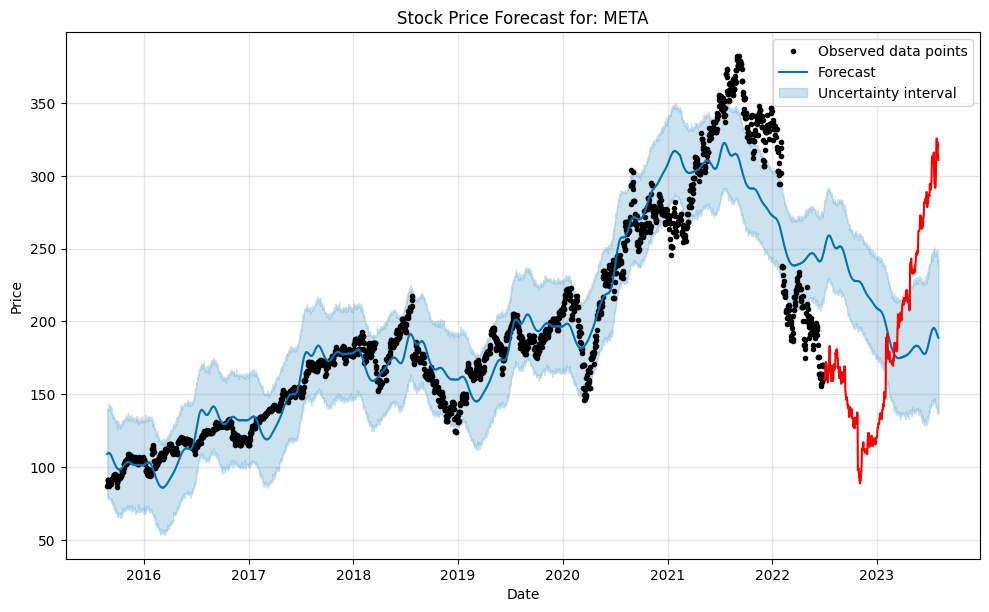

             ds       y
2501 2022-07-01  681.79
2502 2022-07-02  681.79
2503 2022-07-03  681.79
2504 2022-07-04  681.79
2505 2022-07-05  699.20
...         ...     ...
2896 2023-07-31  267.43
2897 2023-08-01  261.07
2898 2023-08-02  254.11
2899 2023-08-03  259.32
2900 2023-08-04  253.86

[400 rows x 2 columns]


01:46:09 - cmdstanpy - INFO - Chain [1] start processing
01:46:10 - cmdstanpy - INFO - Chain [1] done processing


[681.79 681.79 681.79 681.79 699.2  695.2  733.63 752.29 752.29 752.29
 703.03 699.21 711.12 714.94 720.2  720.2  720.2  721.64 736.59 742.5
 815.12 816.73 816.73 816.73 805.3  776.58 824.46 842.7  891.45 891.45
 891.45 891.83 901.76 922.19 925.9  864.51 864.51 864.51 871.27 850.
 883.07 859.89 900.09 900.09 900.09 927.96 919.69 911.99 908.61 890.
 890.   890.   869.74 889.36 891.29 296.07 288.09 288.09 288.09 284.82
 277.7  275.61 277.16 270.21 270.21 270.21 270.21 274.42 283.7  289.26
 299.68 299.68 299.68 304.42 292.13 302.61 303.75 303.35 303.35 303.35
 309.07 308.73 300.8  288.59 275.33 275.33 275.33 276.01 282.94 287.81
 268.21 265.25 265.25 265.25 242.4  249.44 240.81 238.13 223.07 223.07
 223.07 222.96 216.5  217.24 221.72 204.99 204.99 204.99 219.35 220.19
 222.04 207.28 214.44 214.44 214.44 211.25 222.41 224.64 225.09 228.52
 228.52 228.52 227.54 227.82 214.98 215.31 207.47 207.47 207.47 197.08
 191.3  177.59 190.72 195.97 195.97 195.97 190.95 194.42 186.92 183.17
 180.19 180

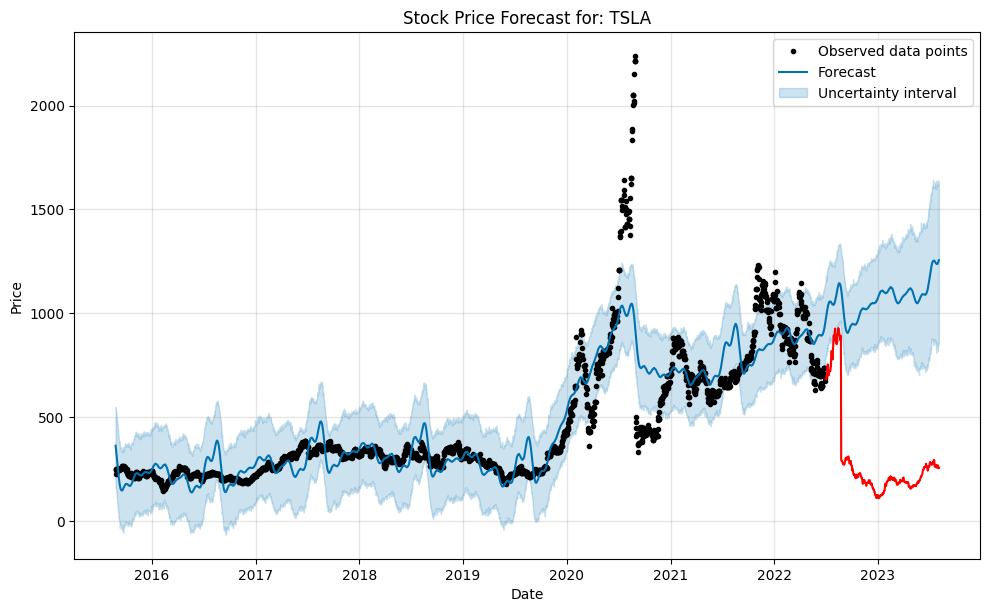

             ds       y
2501 2022-07-01  141.12
2502 2022-07-02  141.12
2503 2022-07-03  141.12
2504 2022-07-04  141.12
2505 2022-07-05  137.62
...         ...     ...
2896 2023-07-31  144.18
2897 2023-08-01  143.33
2898 2023-08-02  144.17
2899 2023-08-03  144.45
2900 2023-08-04  144.24

[400 rows x 2 columns]


01:46:11 - cmdstanpy - INFO - Chain [1] start processing
01:46:13 - cmdstanpy - INFO - Chain [1] done processing


[141.12 141.12 141.12 141.12 137.62 138.08 140.83 140.47 140.47 140.47
 141.   139.18 137.18 139.06 139.92 139.92 139.92 138.13 130.88 129.18
 127.15 128.25 128.25 128.25 128.54 128.08 129.12 129.22 130.79 130.79
 130.79 132.04 131.81 132.34 131.64 132.48 132.48 132.48 132.61 129.47
 131.5  132.54 134.01 134.01 134.01 134.93 136.56 137.79 139.07 138.37
 138.37 138.37 135.55 134.74 133.23 133.98 130.38 130.38 130.38 130.31
 129.58 128.45 129.66 127.79 127.79 127.79 127.79 126.72 127.71 128.47
 129.19 129.19 129.19 130.66 127.25 127.69 125.49 127.27 127.27 127.27
 127.73 126.3  124.93 125.31 122.71 122.71 122.71 122.01 121.74 122.76
 121.63 118.81 118.81 118.81 121.51 125.5  125.74 122.23 118.82 118.82
 118.82 117.75 117.8  117.57 121.79 120.04 120.04 120.04 121.52 122.94
 122.51 128.3  129.9  129.9  129.9  132.69 132.93 135.01 134.77 138.51
 138.51 138.51 138.29 138.2  136.83 134.47 136.96 136.96 136.96 138.34
 140.04 137.39 141.23 143.17 143.17 143.17 144.2  144.34 144.52 146.09
 147.6

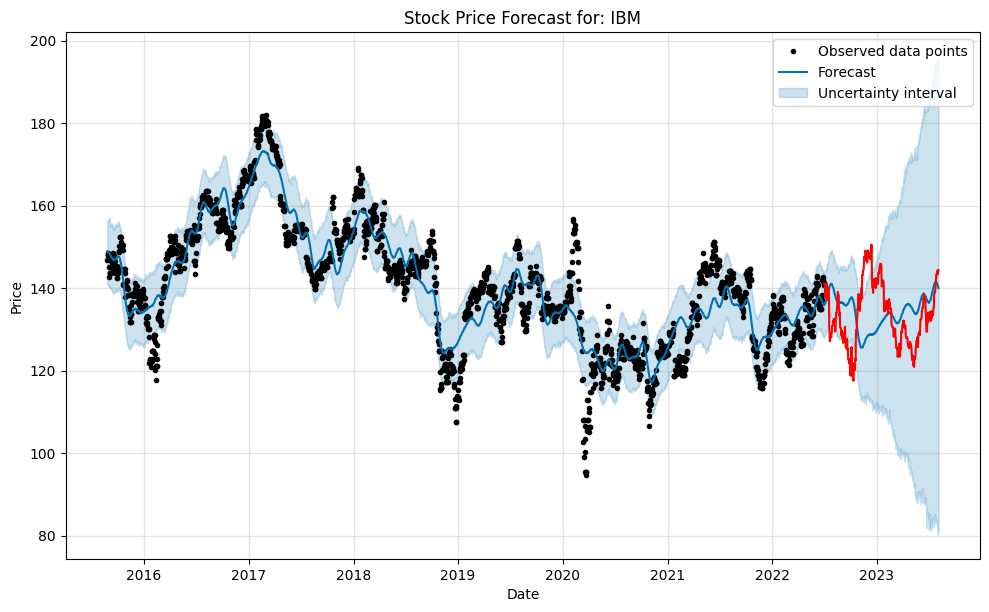

In [23]:
# for stock in ["MSFT","JPM","META","TSLA","IBM"]:


#     data = {
#         'ds': df["Date"],
#         'y': df[stock]
#     }

#     df_model_data = pd.DataFrame(data)

#     df_model_data['ds'] = pd.to_datetime(df_model_data['ds'])
#     model = Prophet()

#     model.fit(df_model_data)
#     future = model.make_future_dataframe(periods=100)
#     forecast = model.predict(future)

#     forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
#     fig1 = model.plot(forecast)
#     plt.title("Stock Price Forecast for: "+ f"{stock}")
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.show()


# Assuming you have imported all the required libraries and loaded the data frame as 'df'

for stock in ["MSFT", "JPM", "META", "TSLA", "IBM"]:
    data = {
        'ds': df["Date"],
        'y': pd.to_numeric(df[stock])
    }

    df_model_data = pd.DataFrame(data)

    df_model_data['ds'] = pd.to_datetime(df_model_data['ds'])
    model = Prophet()

    # Split data into training and testing sets
    train_data = df_model_data[:-400]  # Assuming the last 100 rows are for testing
    test_data = df_model_data[-400:]

    print(test_data)
    # Fit the model using training data
    model.fit(train_data)

    # Make predictions for the testing period
    future = model.make_future_dataframe(periods=400)
    forecast = model.predict(future)

    # Extract only the testing period predictions
    forecast_test = forecast[-400:]

    # Calculate accuracy metrics and error percentage
    actual_values = test_data['y'].values
    predicted_values = forecast_test['yhat'].values


    print(actual_values)
    print(predicted_values)
    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = (abs((actual_values - predicted_values) / actual_values)).mean() * 100

    # Calculate Root Mean Squared Error (RMSE)
    rmse = ((actual_values - predicted_values) ** 2).mean() ** 0.5

    # Print the accuracy metrics and error percentage
    print(f"Stock: {stock}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("------------------------------------------")

    # Plot the forecast
    fig1 = model.plot(forecast)
    fig1.axes[0].plot(test_data['ds'],test_data['y'],color='r')
    # ax.plot(forecast_test,color='r')
    plt.title("Stock Price Forecast for: " + stock)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


    # Python


    # with open(f"{stock}"+"_model.json", 'w') as fout:
    #     fout.write(model_to_json(model))  
    # #Save model
    # model_file = f"{stock}_model.json"
    # with open(model_file, 'w') as f:
    #     json.dump(model.serialize(), f)

    # print(f"Model for {stock} saved to {model_file}")

In [24]:
test_data

,ds,y
2501,2022-07-01,141.12
2502,2022-07-02,141.12
2503,2022-07-03,141.12
2504,2022-07-04,141.12
2505,2022-07-05,137.62
...,...,...
2896,2023-07-31,144.18
2897,2023-08-01,143.33
2898,2023-08-02,144.17
2899,2023-08-03,144.45
